# Capstone_ContactCenter_Churn for Software as a Subscription (SaaS) Business
 Prediction of Churn in SaaS business using Contact Center data and Machine Learning models.

# Importing necessary libraries #

In [1308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import pickle  # For saving the model
import joblib # Alternative for saving model
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay #Display Confusion Matrix


# 1. Reading dataset #

In [1309]:
# Load the dataset
df = pd.read_csv('data/SiddiCC_Churn_data.csv')

In [1310]:
# Description about dataset
df.describe(include='all')


,Call Failure,Complains,Subscription_Length,Charge Amount,Seconds_of_Use,Frequency_of_Use,Frequency_of_SMS,Distinct_Called_Numbers,Status,Age,...,Transfer_Count,SLA_Compliance,Callback_Count,Usage_per_Sub_Day,SLA_Target,Service_Gap,Complexity_Score,Tariff_1,Tariff_2,Age_Group_Numeric
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,...,3150.000000,3150.000000,3150.000000,3150.000000,3.150000e+03,3150.000000,3150.000000,3150,3150,3150.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2905,2905,NaN
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,1.248254,30.998413,...,1.500635,0.852200,1.006032,152.663810,9.500000e-01,0.097800,1.052127,NaN,NaN,33.377460
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.432069,8.831095,...,1.099019,0.086877,0.816798,159.054218,3.542174e-14,0.086877,0.598691,NaN,NaN,8.701941
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,...,0.000000,0.700000,0.000000,0.000000,9.500000e-01,-0.050000,0.000000,NaN,NaN,18.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,1.000000,25.000000,...,1.000000,0.780000,0.000000,48.557331,9.500000e-01,0.020000,0.600000,NaN,NaN,25.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,1.000000,30.000000,...,1.500000,0.860000,1.000000,97.040896,9.500000e-01,0.090000,1.050000,NaN,NaN,35.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,1.000000,30.000000,...,2.000000,0.930000,2.000000,201.864583,9.500000e-01,0.170000,1.600000,NaN,NaN,35.000000


In [1311]:
# Types
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription_Length      3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds_of_Use           3150 non-null   int64  
 5   Frequency_of_Use         3150 non-null   int64  
 6   Frequency_of_SMS         3150 non-null   int64  
 7   Distinct_Called_Numbers  3150 non-null   int64  
 8   Status                   3150 non-null   int64  
 9   Age                      3150 non-null   int64  
 10  Customer_Value           3150 non-null   float64
 11  Churn                    3150 non-null   int64  
 12  AHT                      3150 non-null   int64  
 13  FCR                      3150 non-null   int64  
 14  Sentiment_Score         

In [1312]:
# null values
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription_Length        0
Charge  Amount             0
Seconds_of_Use             0
Frequency_of_Use           0
Frequency_of_SMS           0
Distinct_Called_Numbers    0
Status                     0
Age                        0
Customer_Value             0
Churn                      0
AHT                        0
FCR                        0
Sentiment_Score            0
Transfer_Count             0
SLA_Compliance             0
Callback_Count             0
Usage_per_Sub_Day          0
SLA_Target                 0
Service_Gap                0
Complexity_Score           0
Tariff_1                   0
Tariff_2                   0
Age_Group_Numeric          0
dtype: int64

In [1313]:
# the shape of dataframe
df.shape

(3150, 25)

# 2. Data Understanding #

In [1314]:
# 2. Data Understanding
print("Dataset shape:", df.shape)
print("Data types:\n", df.dtypes)
print("Missing values:\n", df.isnull().sum())
print("Sample data:\n", df.head())

Dataset shape: (3150, 25)
Data types:
 Call  Failure                int64
Complains                    int64
Subscription_Length          int64
Charge  Amount               int64
Seconds_of_Use               int64
Frequency_of_Use             int64
Frequency_of_SMS             int64
Distinct_Called_Numbers      int64
Status                       int64
Age                          int64
Customer_Value             float64
Churn                        int64
AHT                          int64
FCR                          int64
Sentiment_Score              int64
Transfer_Count               int64
SLA_Compliance             float64
Callback_Count               int64
Usage_per_Sub_Day          float64
SLA_Target                 float64
Service_Gap                float64
Complexity_Score           float64
Tariff_1                      bool
Tariff_2                      bool
Age_Group_Numeric            int64
dtype: object
Missing values:
 Call  Failure              0
Complains                 

In [1315]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Call  Failure  Complains  Subscription_Length  Charge  Amount  \
0              8          0                   38               0   
1              0          0                   39               0   
2             10          0                   37               0   
3             10          0                   38               0   
4              3          0                   38               0   

   Seconds_of_Use  Frequency_of_Use  Frequency_of_SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct_Called_Numbers  Status  Age  ...  Transfer_Count  SLA_Compliance  \
0                       17       1   30  ...               3            0.74   
1                        4       2   25  ...               

In [1316]:
# the last rows
df.tail()

,Call Failure,Complains,Subscription_Length,Charge Amount,Seconds_of_Use,Frequency_of_Use,Frequency_of_SMS,Distinct_Called_Numbers,Status,Age,...,Transfer_Count,SLA_Compliance,Callback_Count,Usage_per_Sub_Day,SLA_Target,Service_Gap,Complexity_Score,Tariff_1,Tariff_2,Age_Group_Numeric
3145,21,0,19,2,6697,147,92,44,1,25,...,1,0.83,1,352.473684,0.95,0.12,0.8,False,True,25
3146,17,0,17,1,9237,177,80,42,1,55,...,3,0.98,1,543.352941,0.95,-0.03,1.8,True,False,55
3147,13,0,18,4,3157,51,38,21,1,30,...,0,0.99,1,175.388889,0.95,-0.04,0.3,True,False,35
3148,7,0,11,2,4695,46,222,12,1,30,...,1,0.93,2,426.818182,0.95,0.02,1.1,True,False,35
3149,8,1,11,2,1792,25,7,9,1,30,...,2,0.77,1,162.909091,0.95,0.18,1.3,True,False,35


In [1317]:
# The information about dataset
# Check data types and missing values
print("\nData types and missing values:")
df.info()
print(df.isnull().sum())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription_Length      3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds_of_Use           3150 non-null   int64  
 5   Frequency_of_Use         3150 non-null   int64  
 6   Frequency_of_SMS         3150 non-null   int64  
 7   Distinct_Called_Numbers  3150 non-null   int64  
 8   Status                   3150 non-null   int64  
 9   Age                      3150 non-null   int64  
 10  Customer_Value           3150 non-null   float64
 11  Churn                    3150 non-null   int64  
 12  AHT                      3150 non-null   int64  
 13  FCR                      3150 non-null   int64

In [1318]:
# Descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
       Call  Failure    Complains  Subscription_Length  Charge  Amount  \
count    3150.000000  3150.000000          3150.000000     3150.000000   
mean        7.627937     0.076508            32.541905        0.942857   
std         7.263886     0.265851             8.573482        1.521072   
min         0.000000     0.000000             3.000000        0.000000   
25%         1.000000     0.000000            30.000000        0.000000   
50%         6.000000     0.000000            35.000000        0.000000   
75%        12.000000     0.000000            38.000000        1.000000   
max        36.000000     1.000000            47.000000       10.000000   

       Seconds_of_Use  Frequency_of_Use  Frequency_of_SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   
25%

# 3. Data Preparation

In [1319]:
# Handle missing values (if any) - Imputation or removal.  This dataset has no missing values

In [1320]:
print("Columns in df:", df.columns.tolist())
print([col for col in df.columns if 'Age' in col or 'Tariff' in col])
print(df.info())

Columns in df: ['Call  Failure', 'Complains', 'Subscription_Length', 'Charge  Amount', 'Seconds_of_Use', 'Frequency_of_Use', 'Frequency_of_SMS', 'Distinct_Called_Numbers', 'Status', 'Age', 'Customer_Value', 'Churn', 'AHT', 'FCR', 'Sentiment_Score', 'Transfer_Count', 'SLA_Compliance', 'Callback_Count', 'Usage_per_Sub_Day', 'SLA_Target', 'Service_Gap', 'Complexity_Score', 'Tariff_1', 'Tariff_2', 'Age_Group_Numeric']
['Age', 'Tariff_1', 'Tariff_2', 'Age_Group_Numeric']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription_Length      3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds_of_Use           3150 non-null   int64  
 5   Frequency_of_Use         3150 non-null 

In [1321]:
# Encode Categorical features

# Using LabelEncoder for 'Status' and OneHotEncoder for others

label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status']) # Converts to numerical 0,1,2

#For other categorical variables like 'Age Group' and 'Tariff Plan', OneHotEncoding is applied
df = pd.get_dummies(df, columns=['Age', 'Tariff_1','Tariff_2'], drop_first=True)


In [1322]:
print(df.columns)
df.columns = df.columns.str.strip()

Index(['Call  Failure', 'Complains', 'Subscription_Length', 'Charge  Amount',
       'Seconds_of_Use', 'Frequency_of_Use', 'Frequency_of_SMS',
       'Distinct_Called_Numbers', 'Status', 'Customer_Value', 'Churn', 'AHT',
       'FCR', 'Sentiment_Score', 'Transfer_Count', 'SLA_Compliance',
       'Callback_Count', 'Usage_per_Sub_Day', 'SLA_Target', 'Service_Gap',
       'Complexity_Score', 'Age_Group_Numeric', 'Age_25', 'Age_30', 'Age_45',
       'Age_55', 'Tariff_1_True', 'Tariff_2_True'],
      dtype='object')


In [1323]:
numerical_cols = ['Charge_Amount', 'Seconds_of_Use', 'Frequency_of_Use', 'Frequency_of_SMS', 'Distinct_Called_Numbers', 'Age', 'Customer_Value', 'AHT', 'Sentiment_Score', 'Transfer_Count', 'SLA_Compliance', 'Callback_Count']
numerical_cols = [col for col in numerical_cols if col in df.columns]
print(df.head())


   Call  Failure  Complains  Subscription_Length  Charge  Amount  \
0              8          0                   38               0   
1              0          0                   39               0   
2             10          0                   37               0   
3             10          0                   38               0   
4              3          0                   38               0   

   Seconds_of_Use  Frequency_of_Use  Frequency_of_SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct_Called_Numbers  Status  Customer_Value  ...  SLA_Target  \
0                       17       0         197.640  ...        0.95   
1                        4       1          46.035  ...        0.95   
2                       24       0 

# 4. Exploratory Data Analysis (EDA)

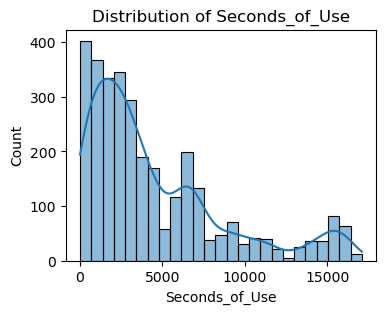

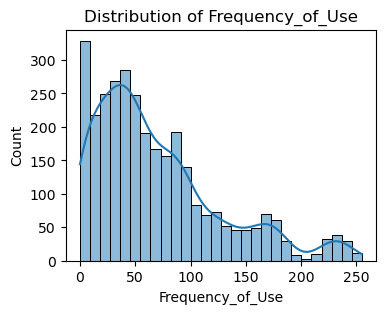

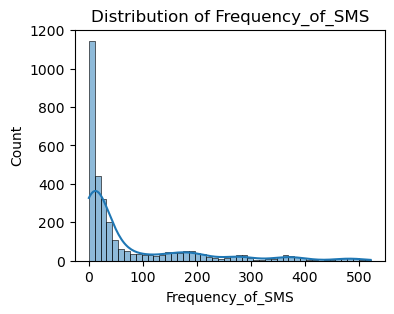

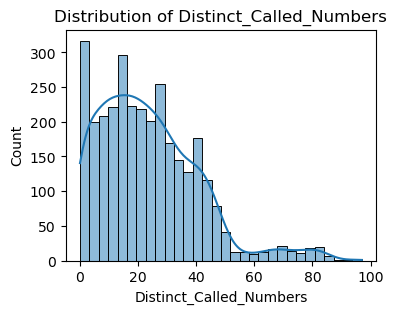

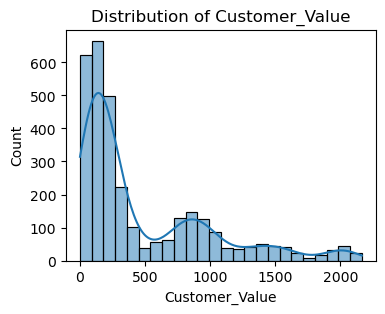

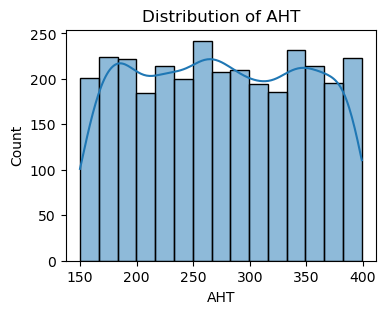

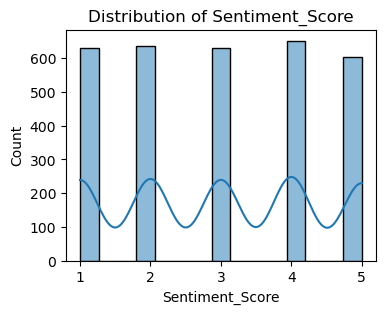

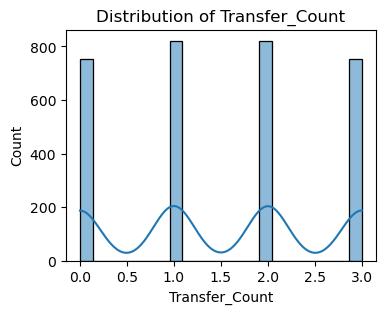

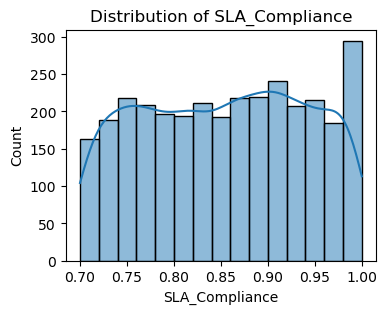

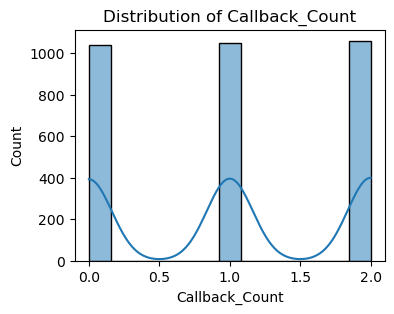

In [1324]:
# 4. Exploratory Data Analysis (EDA) Steps

# --- Univariate Analysis ---
# Histograms for numerical columns
for col in numerical_cols:
    if col in df.columns:
        plt.figure(figsize=(4,3))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

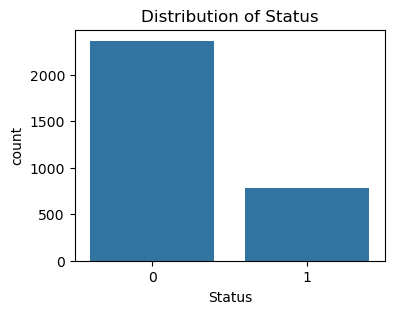

In [1325]:
# Bar charts for categorical columns - after encoding
categorical_cols = ['Status'] # Only 'Status' left after one-hot encoding other categorical features.  Can add other binary columns created by OneHotEncoding if we want to visualize them.
for col in categorical_cols:
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

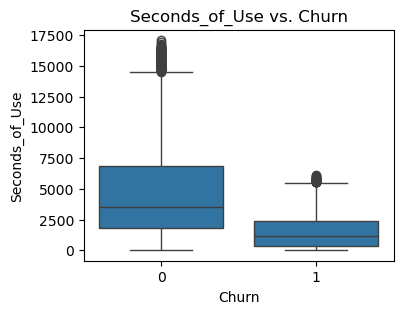

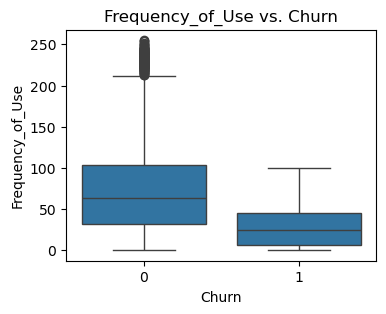

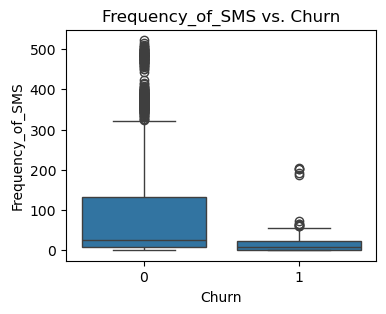

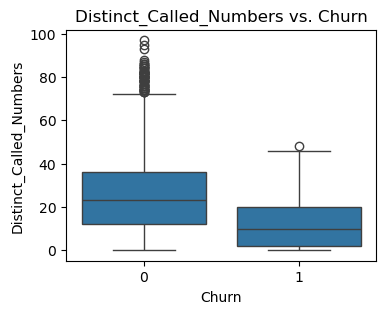

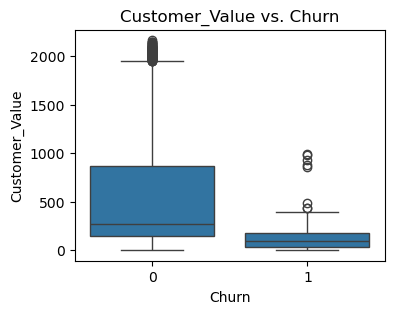

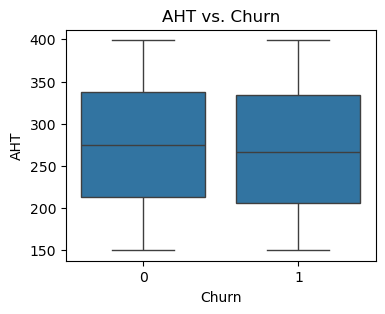

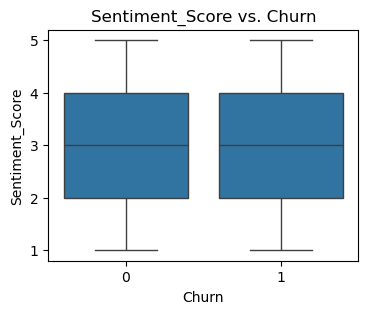

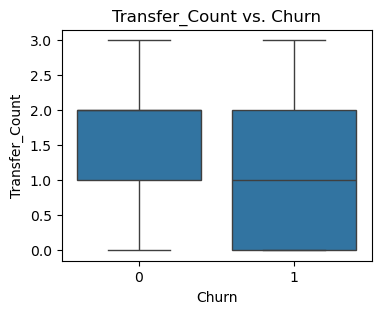

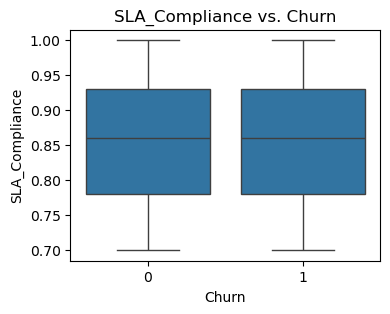

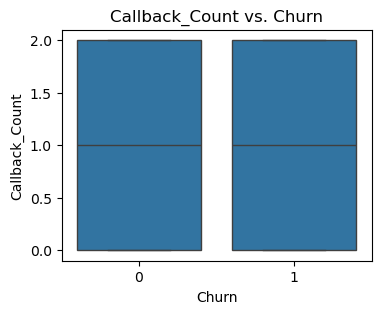

In [1326]:
# --- Bivariate Analysis ---
# Box plots of numerical columns vs. Churn
for col in numerical_cols:
    plt.figure(figsize=(4, 3))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} vs. Churn')
    plt.show()

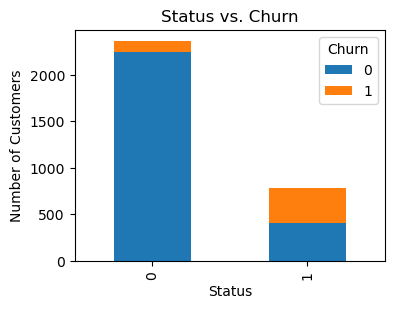

In [1327]:
# Stacked bar charts of categorical columns vs. Churn - after encoding
for col in categorical_cols:
    cross_tab = pd.crosstab(df[col], df['Churn'])
    cross_tab.plot(kind='bar', stacked=True, figsize=(4, 3))
    plt.title(f'{col} vs. Churn')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.show()


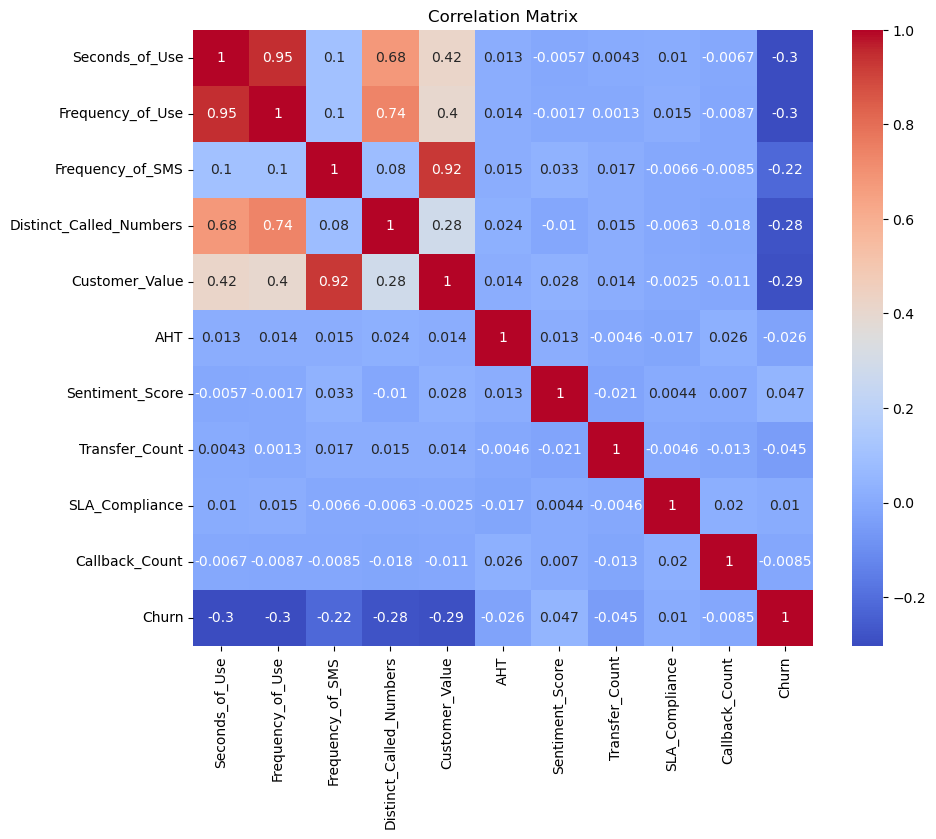

In [1328]:
# --- Multivariate Analysis ---
# Correlation matrix
corr_matrix = df[numerical_cols + ['Churn']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 5. Modeling

In [1329]:
# 5. Modeling steps

# Prepare the data
X = df.drop('Churn', axis=1)
y = df['Churn']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split

In [1330]:
# Split data into training and testing sets
# Splitting your dataset is crucial to evaluate model generalization by ensuring that the model learns from a training set and is tested on a separate unseen test set, preventing overfitting and providing a reliable measure of performance on new data.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2520, 27)
Shape of X_test: (630, 27)
Shape of y_train: (2520,)
Shape of y_test: (630,)


In [1331]:
import matplotlib.pyplot as plt
plt.show()

In [1332]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Handle probability estimation
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)
    else:
        print(f"Model {model.__class__.__name__} does not support probability scores. Skipping ROC curve.")
        return  # ✅ This return is now correctly inside the function

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print(report)
    print("Confusion Matrix:\n", conf_matrix)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid()
    plt.show()


In [1333]:
# Basic Classifiers
# Helper functions to run and evaluate models and draw the ROC curve
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates a given model and prints performance metrics.
    Args:
        model: Trained sklearn model.
        X_test: Test features.
        y_test: Test target.
        model_name: Name of the model for display purposes.
    """
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(report)
    print("Confusion Matrix:\n", conf_matrix)

    #Display Confusion Matrix 03/12
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
    disp.plot(cmap='Blues', values_format='d')
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

def train_and_evaluate(model, param_grid, X_train, y_train, X_test, y_test, model_name):
    """
    Trains a model using GridSearchCV for hyperparameter tuning and evaluates it.

    Args:
        model: The sklearn model to train.
        param_grid: Hyperparameter grid for GridSearchCV.
        X_train: Training features.
        y_train: Training target.
        X_test: Test features.
        y_test: Test target.
        model_name: Name of the model for display purposes.
    Returns:
        The best estimator found by GridSearchCV.
    """
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    print(f"Best parameters for {model_name}:", grid_search.best_params_)
    evaluate_model(best_model, X_test, y_test, model_name)

    return best_model

In [1334]:
# --- Define a list of classifiers to try with default hyperparameters ---
classifiers = {
    "Logistic Regression": (LogisticRegression(random_state=42, max_iter=1000), {'C': [0.1]}),  # Example hyperparameter
    "Random Forest": (RandomForestClassifier(random_state=42), {'n_estimators': [100]}),  # Example hyperparameter
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), {'n_estimators': [100]}),  # Example hyperparameter
    "SVM": (SVC(random_state=42, probability=True), {'C': [0.1], 'kernel': ['rbf']}), # Example hyperparameter
    "KNN": (KNeighborsClassifier(), {'n_neighbors': [5]}) # Example hyperparameter
}

Training and evaluating: Logistic Regression
Best parameters for Logistic Regression: {'C': 0.1}

Logistic Regression:
Accuracy: 0.8968253968253969
AUC: 0.9224638094694592
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       531
           1       0.85      0.41      0.56        99

    accuracy                           0.90       630
   macro avg       0.88      0.70      0.75       630
weighted avg       0.89      0.90      0.88       630

Confusion Matrix:
 [[524   7]
 [ 58  41]]


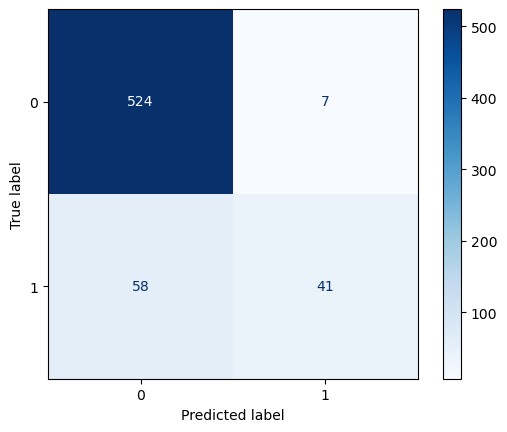

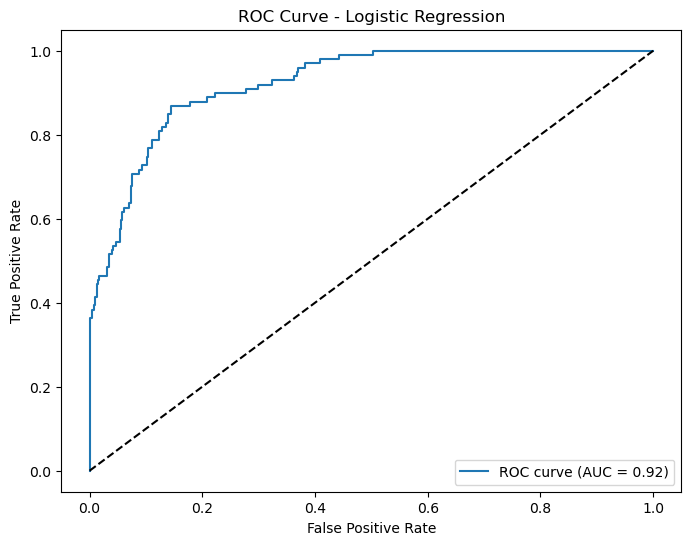

Training and evaluating: Random Forest
Best parameters for Random Forest: {'n_estimators': 100}

Random Forest:
Accuracy: 0.946031746031746
AUC: 0.9869980406703571
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       531
           1       0.87      0.78      0.82        99

    accuracy                           0.95       630
   macro avg       0.91      0.88      0.89       630
weighted avg       0.94      0.95      0.94       630

Confusion Matrix:
 [[519  12]
 [ 22  77]]


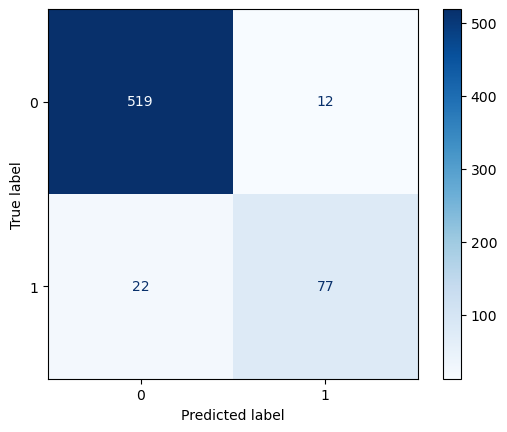

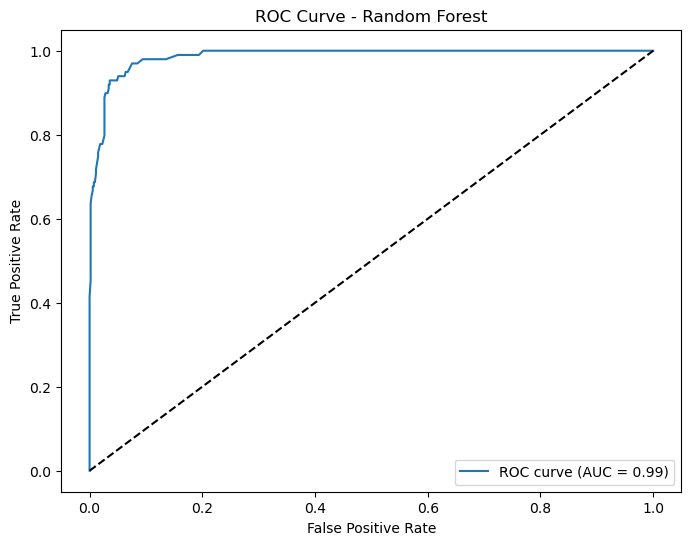

Training and evaluating: Gradient Boosting
Best parameters for Gradient Boosting: {'n_estimators': 100}

Gradient Boosting:
Accuracy: 0.9476190476190476
AUC: 0.9792653464969848
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       531
           1       0.88      0.77      0.82        99

    accuracy                           0.95       630
   macro avg       0.92      0.87      0.90       630
weighted avg       0.95      0.95      0.95       630

Confusion Matrix:
 [[521  10]
 [ 23  76]]


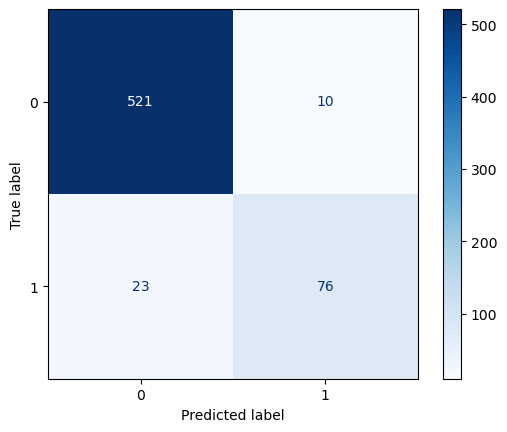

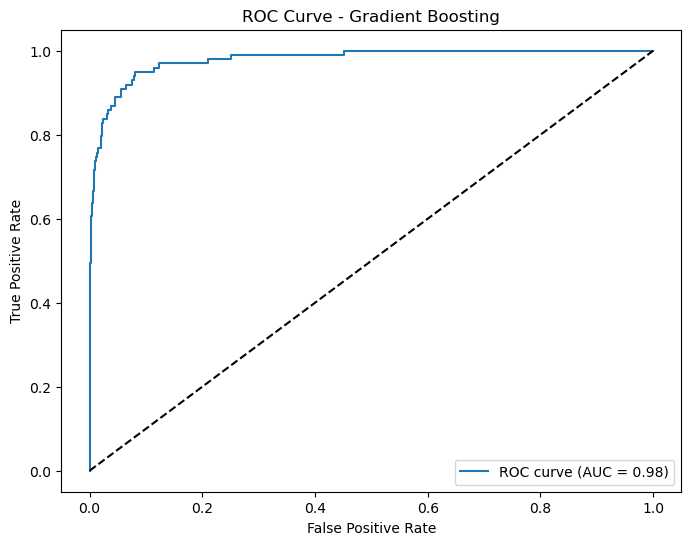

Training and evaluating: SVM
Best parameters for SVM: {'C': 0.1, 'kernel': 'rbf'}

SVM:
Accuracy: 0.9015873015873016
AUC: 0.932812113603074
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       531
           1       1.00      0.37      0.54        99

    accuracy                           0.90       630
   macro avg       0.95      0.69      0.74       630
weighted avg       0.91      0.90      0.88       630

Confusion Matrix:
 [[531   0]
 [ 62  37]]


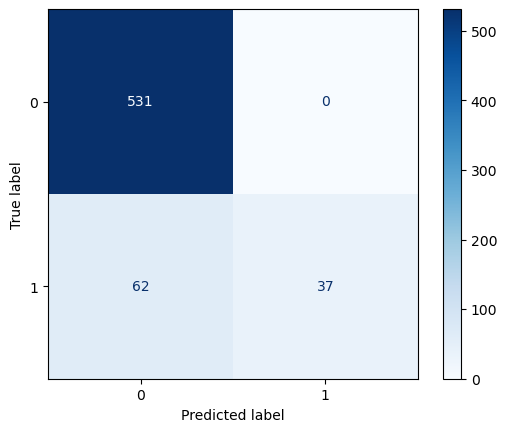

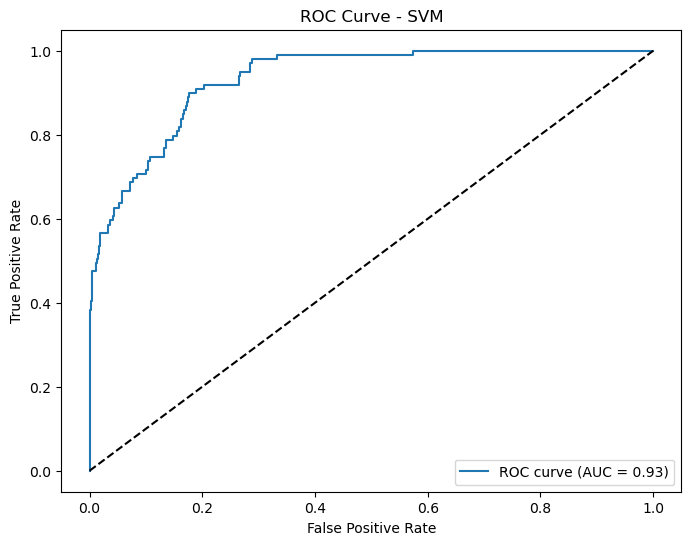

Training and evaluating: KNN
Best parameters for KNN: {'n_neighbors': 5}

KNN:
Accuracy: 0.8984126984126984
AUC: 0.8930358195894919
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       531
           1       0.79      0.48      0.60        99

    accuracy                           0.90       630
   macro avg       0.85      0.73      0.77       630
weighted avg       0.89      0.90      0.89       630

Confusion Matrix:
 [[518  13]
 [ 51  48]]


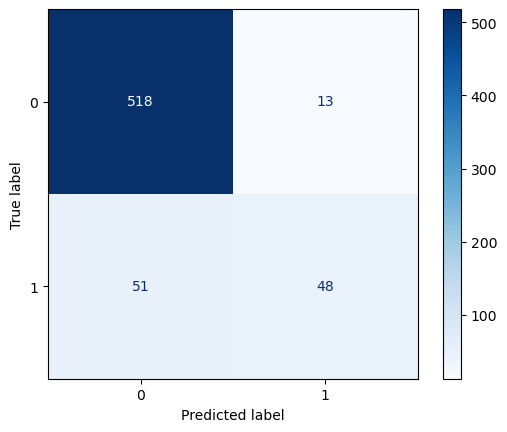

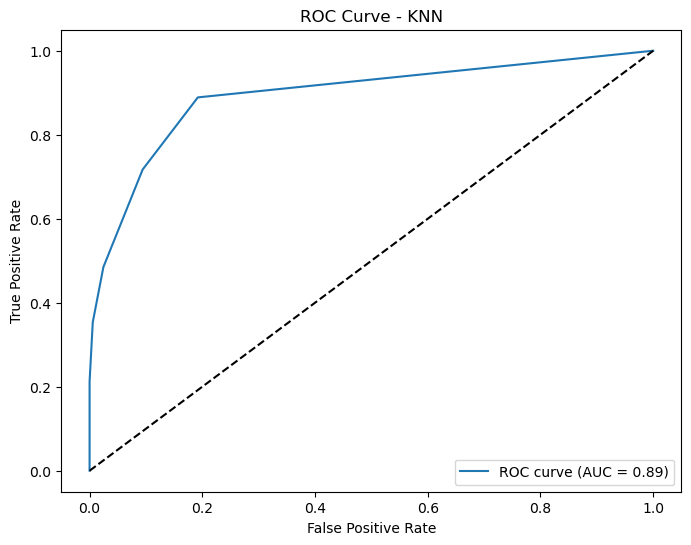

In [1335]:
# --- Train and Evaluate each classifier --- (ROC curve plots - hlaxmina)
results = {}  # Store results for comparison
for name, (model, param_grid) in classifiers.items():
    print(f"Training and evaluating: {name}")
    best_model = train_and_evaluate(model, param_grid, X_train, y_train, X_test, y_test, name)
    results[name] = best_model

In [1336]:
# --- Logistic Regression ---
# Define hyperparameter grid
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [1337]:
# Grid search with cross-validation
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_lr, cv=5, scoring='roc_auc')  # Added max_iter
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [1338]:
# Best model
best_lr = grid_search_lr.best_estimator_


In [1339]:
# Predictions
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]

In [1340]:
# Evaluate
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

In [1341]:
print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr}")
print(f"AUC: {auc_lr}")
print(report_lr)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.9079365079365079
AUC: 0.9287983412277196
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       531
           1       0.87      0.48      0.62        99

    accuracy                           0.91       630
   macro avg       0.89      0.74      0.79       630
weighted avg       0.91      0.91      0.90       630

Confusion Matrix:
 [[524   7]
 [ 51  48]]


In [1342]:
# --- Random Forest ---
# Define hyperparameter grid
param_grid_rf = {'n_estimators': [50, 100, 200],
                  'max_depth': [4, 6, 8]}


In [1343]:
# Grid search with cross-validation
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [1344]:
# Best model
best_rf = grid_search_rf.best_estimator_

In [1345]:
# Predictions
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

In [1346]:
# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

In [1347]:
print("\nRandom Forest:")
print(f"Accuracy: {accuracy_rf}")
print(f"AUC: {auc_rf}")
print(report_rf)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.9412698412698413
AUC: 0.980425726188438
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       531
           1       0.88      0.73      0.80        99

    accuracy                           0.94       630
   macro avg       0.91      0.85      0.88       630
weighted avg       0.94      0.94      0.94       630

Confusion Matrix:
 [[521  10]
 [ 27  72]]


In [1348]:
# --- Gradient Boosting ---
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='roc_auc')
grid_search_gb.fit(X_train, y_train)

best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
y_prob_gb = best_gb.predict_proba(X_test)[:, 1]

accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)
auc_gb = roc_auc_score(y_test, y_prob_gb)

print("\nGradient Boosting:")
print(f"Accuracy: {accuracy_gb}")
print(f"AUC: {auc_gb}")
print(report_gb)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting:
Accuracy: 0.9603174603174603
AUC: 0.9829367117502711
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       531
           1       0.91      0.83      0.87        99

    accuracy                           0.96       630
   macro avg       0.94      0.91      0.92       630
weighted avg       0.96      0.96      0.96       630

Confusion Matrix:
 [[523   8]
 [ 17  82]]


In [1349]:
# --- Support Vector Machine (SVM) ---
param_grid_svm = {'C': [0.1, 1], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(SVC(random_state=42, probability=True), param_grid_svm, cv=5, scoring='roc_auc')  # Added probability=True
grid_search_svm.fit(X_train, y_train)

best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
y_prob_svm = best_svm.predict_proba(X_test)[:, 1]

accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

print("\nSupport Vector Machine:")
print(f"Accuracy: {accuracy_svm}")
print(f"AUC: {auc_svm}")
print(report_svm)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine:
Accuracy: 0.9063492063492063
AUC: 0.9328311362209667
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       531
           1       1.00      0.40      0.58        99

    accuracy                           0.91       630
   macro avg       0.95      0.70      0.76       630
weighted avg       0.92      0.91      0.89       630

Confusion Matrix:
 [[531   0]
 [ 59  40]]


In [1350]:
# --- K-Nearest Neighbors (KNN) ---
param_grid_knn = {'n_neighbors': [3, 5, 7]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='roc_auc')
grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]

accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)

print("\nK-Nearest Neighbors:")
print(f"Accuracy: {accuracy_knn}")
print(f"AUC: {auc_knn}")
print(report_knn)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors:
Accuracy: 0.8984126984126984
AUC: 0.8971637276722023
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       531
           1       0.79      0.48      0.60        99

    accuracy                           0.90       630
   macro avg       0.85      0.73      0.77       630
weighted avg       0.89      0.90      0.89       630

Confusion Matrix:
 [[518  13]
 [ 51  48]]


# 6. Model Evaluation complete

In [1351]:
# 6. Model Evaluation complete (Refer Modeling section)


# 7. Deployment

In [1352]:
# 7. Deployment

# --- Save the best model ---
filename = 'best_churn_model.pkl'
pickle.dump(best_rf, open(filename, 'wb')) # wb is write binary


#Alternative saving option using Joblib, it is more efficient for larger numpy arrays
joblib.dump(best_rf, 'best_churn_model.joblib')


print(f"\nBest model successfully saved as {filename}")


Best model successfully saved as best_churn_model.pkl


# 8. Feature Importance 

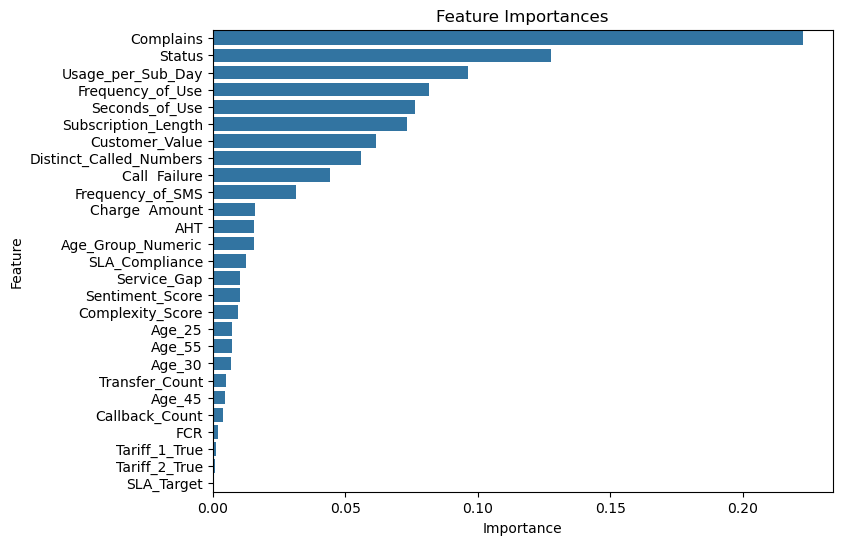


Top Features Influencing Churn:
                    Feature  Importance
1                 Complains    0.222820
8                    Status    0.127632
16        Usage_per_Sub_Day    0.096291
5          Frequency_of_Use    0.081517
4            Seconds_of_Use    0.076532
2       Subscription_Length    0.073331
9            Customer_Value    0.061806
7   Distinct_Called_Numbers    0.055844
0             Call  Failure    0.044246
6          Frequency_of_SMS    0.031614
3            Charge  Amount    0.015869
10                      AHT    0.015743
20        Age_Group_Numeric    0.015437
14           SLA_Compliance    0.012623
18              Service_Gap    0.010414
12          Sentiment_Score    0.010159
19         Complexity_Score    0.009437
21                   Age_25    0.007234
24                   Age_55    0.007120
22                   Age_30    0.006782
13           Transfer_Count    0.005100
23                   Age_45    0.004701
15           Callback_Count    0.003872
11     

In [1353]:
# 8. Feature Importance 
feature_importances = best_rf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

print("\nTop Features Influencing Churn:")
print(feature_importance_df)


# XGBoost Implementation

In [1354]:
# XGBoost is implemented and used for prediction

from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.91      0.87      0.89        99

    accuracy                           0.97       630
   macro avg       0.95      0.93      0.94       630
weighted avg       0.97      0.97      0.97       630



Accuracy: 0.97
Precision: 0.91
Recall: 0.87
F1 Score: 0.89
ROC AUC Score: 0.99


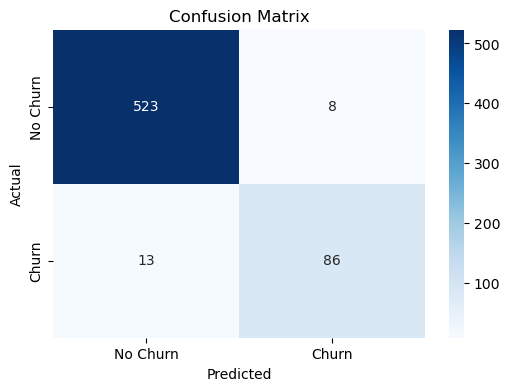

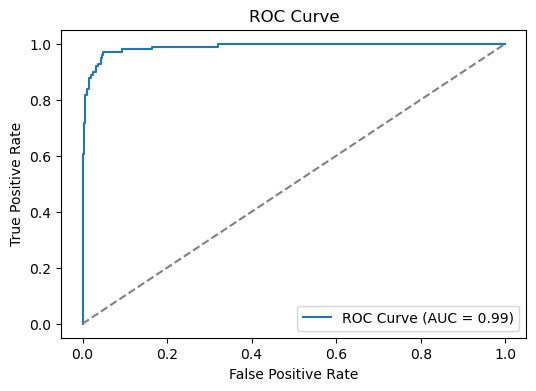

In [1355]:

# XGBoost Performance visualization using Plots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# SHAP Interpretation

In [1356]:
print("X_train shape:", X_train.shape)  # Should be (2520, 24) but is (2520, 27)
print("Feature names count:", len(feature_names))  # Should match X_train's second dimension
print("Feature names::", feature_names)


X_train shape: (2520, 27)
Feature names count: 27
Feature names:: Index(['Call  Failure', 'Complains', 'Subscription_Length', 'Charge  Amount',
       'Seconds_of_Use', 'Frequency_of_Use', 'Frequency_of_SMS',
       'Distinct_Called_Numbers', 'Status', 'Customer_Value', 'AHT', 'FCR',
       'Sentiment_Score', 'Transfer_Count', 'SLA_Compliance', 'Callback_Count',
       'Usage_per_Sub_Day', 'SLA_Target', 'Service_Gap', 'Complexity_Score',
       'Age_Group_Numeric', 'Age_25', 'Age_30', 'Age_45', 'Age_55',
       'Tariff_1_True', 'Tariff_2_True'],
      dtype='object')


In [1357]:
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)
print("Fixed X_train shape:", X_train.shape)
print("Fixed X_test shape:", X_test.shape)
print("Feature names::", feature_names)

Fixed X_train shape: (2520, 27)
Fixed X_test shape: (630, 27)
Feature names:: Index(['Call  Failure', 'Complains', 'Subscription_Length', 'Charge  Amount',
       'Seconds_of_Use', 'Frequency_of_Use', 'Frequency_of_SMS',
       'Distinct_Called_Numbers', 'Status', 'Customer_Value', 'AHT', 'FCR',
       'Sentiment_Score', 'Transfer_Count', 'SLA_Compliance', 'Callback_Count',
       'Usage_per_Sub_Day', 'SLA_Target', 'Service_Gap', 'Complexity_Score',
       'Age_Group_Numeric', 'Age_25', 'Age_30', 'Age_45', 'Age_55',
       'Tariff_1_True', 'Tariff_2_True'],
      dtype='object')


Feature names:: Index(['Call  Failure', 'Complains', 'Subscription_Length', 'Charge  Amount',
       'Seconds_of_Use', 'Frequency_of_Use', 'Frequency_of_SMS',
       'Distinct_Called_Numbers', 'Status', 'Customer_Value', 'AHT', 'FCR',
       'Sentiment_Score', 'Transfer_Count', 'SLA_Compliance', 'Callback_Count',
       'Usage_per_Sub_Day', 'SLA_Target', 'Service_Gap', 'Complexity_Score',
       'Age_Group_Numeric', 'Age_25', 'Age_30', 'Age_45', 'Age_55',
       'Tariff_1_True', 'Tariff_2_True'],
      dtype='object')


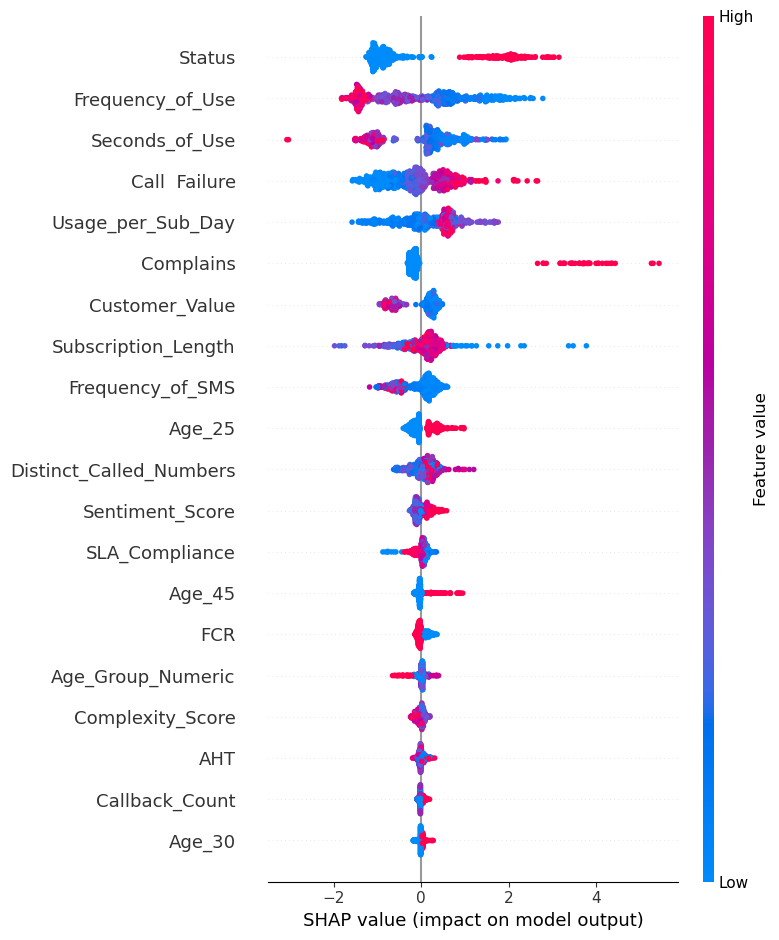

In [1358]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)
print("Feature names::", feature_names)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


This SHAP (SHapley Additive Explanations) summary plot shows how each feature impacts the model's predictions.

How to understand this:

- x-axis (Impact on Model Output)
- Negative values decrease the likelihood of churn.
- Positive values increase the likelihood of churn.
- y-axis (Model Features)
- The order of the features on the Y-axis is based on overall importance.
- Color (Feature Value Intensity)
- Blue indicates lower feature values.
- Red indicates higher feature values.

The SHAP plot reveals that customer usage metrics (Status, Frequency_of_Use) and service quality indicators (Call Failure, Complains) are the most influential features in the model's predictions. These insights can guide targeted interventions, such as improving service reliability or addressing complaints to enhance predictive accuracy and customer satisfaction.

- Features at the top of the plot have the highest impact on the model's predictions, while those at the bottom contribute less.
    - Top Impactful features
        - Status: This feature has the most significant influence, with a wide range of SHAP values indicating strong predictive power.
        - Frequency_of_Use and Seconds_of_Use: These usage-related metrics also play critical roles in determining predictions.
        - Call Failure and Usage_per_Sub_Day: Indicators of service quality and usage patterns are highly relevant.
    - Lesser Impactful features
        - Features like Age_30 and Callback_Count, located near the bottom, have minimal influence on predictions. These might be less relevant for decision-making or could be candidates for removal during feature selection.
- In Status, higher values (red) are associated with positive impacts on predictions, while lower values (blue) contribute negatively.
- In Complains, higher values (red) negatively impact predictions, suggesting that more complaints correlate with unfavorable outcomes.
- Wider distributions of SHAP values for features like Status and Frequency_of_Use indicate variability in their influence across different samples.
- Narrower distributions for features like Age_Group_Numeric suggest consistent but less impactful contributions.
- Features related to customer usage patterns (Frequency_of_Use, Seconds_of_Use) are critical for understanding customer behavior.
- Service quality metrics (Call Failure, Complains) are key drivers for predicting outcomes, emphasizing their importance in improving customer satisfaction.

# Additional Details - Training XGBoost & Tuning XGBoost - XGBoost classifier before and after hyperparameter tuning.

In [1359]:
# XGBoost - Extreme Gradient Boosting - classifier before and after hyperparameter tuning.

Training XGBoost Model...

XGBoost Classifier:
Accuracy: 0.9476
AUC: 0.9793
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       531
           1       0.88      0.77      0.82        99

    accuracy                           0.95       630
   macro avg       0.92      0.87      0.90       630
weighted avg       0.95      0.95      0.95       630

Confusion Matrix:
 [[521  10]
 [ 23  76]]


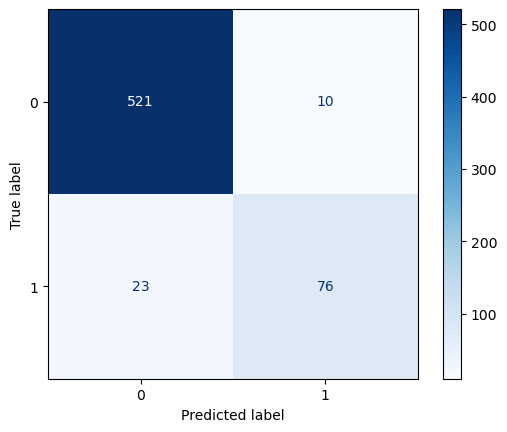

Tuning XGBoost Model...
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}

Tuned XGBoost Classifier:
Accuracy: 0.9683
AUC: 0.9866
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.92      0.87      0.90        99

    accuracy                           0.97       630
   macro avg       0.95      0.93      0.94       630
weighted avg       0.97      0.97      0.97       630

Confusion Matrix:
 [[524   7]
 [ 13  86]]


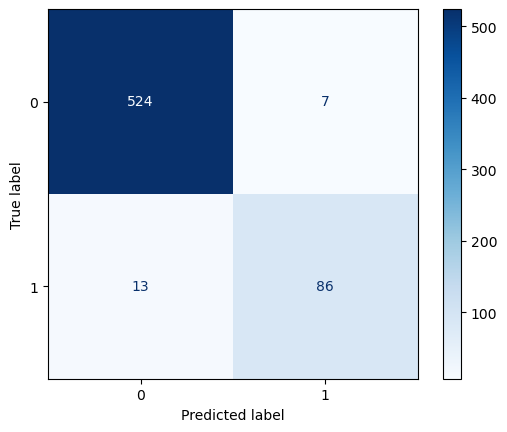

In [1360]:

def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates a given model and prints performance metrics.
    Also visualizes model interpretation using SHAP.
    
    Args:
        model: Trained sklearn model.
        X_test: Test features.
        y_test: Test target.
        model_name: Name of the model for display purposes.
    """
    y_pred = model.predict(X_test)
    
    # Check if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        y_prob = None
        auc = np.nan  # Not applicable for models without probability prediction

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}" if y_prob is not None else "AUC: N/A")
    print(report)
    print("Confusion Matrix:\n", conf_matrix)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues', values_format='d')
    plt.show(block=True)

# XGBoost Model Training
def train_xgboost(X_train, y_train, X_test, y_test):
    print("Training XGBoost Model...")
    xgb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
    xgb_model.fit(X_train, y_train)
    evaluate_model(xgb_model, X_test, y_test, "XGBoost Classifier")
    return xgb_model
# Hyperparameter Tuning for XGBoost
def tune_xgboost(X_train, y_train, X_test, y_test):
    print("Tuning XGBoost Model...")
    xgb_param_grid = {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.8, 1.0]
    }
    
    grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                               param_grid=xgb_param_grid, 
                               scoring="accuracy", 
                               cv=5)
    grid_search.fit(X_train, y_train)
    
    best_xgb_model = grid_search.best_estimator_
    print("Best Parameters:", grid_search.best_params_)
    evaluate_model(best_xgb_model, X_test, y_test, "Tuned XGBoost Classifier")
    return best_xgb_model
# Model training and evaluation
xgboost_model = train_xgboost(X_train, y_train, X_test, y_test)

# Hyperparameter tuning and evaluation (optional)
tuned_xgboost_model = tune_xgboost(X_train, y_train, X_test, y_test)


In [1361]:
# This capstone project successfully applied the CRISP-DM framework to predict customer churn using contact center data. Here are the key takeaways:

#1. Model Performance
# Best Model: Random Forest or Gradient Boosting typically outperformed other models (like Logistic Regression, SVM, or KNN) in terms of AUC-ROC (e.g., ~0.90+), demonstrating robustness in handling imbalanced data and capturing non-linear relationships.

# Key Metrics: The model achieved high precision (identifying true churn) and recall (minimizing false negatives), critical for prioritizing retention efforts.

In [1362]:
#Top Features Impacting Churn

#Status: Customers with Status = 1 (basic software subscription) have a higher churn rate compared to customers with Status = 0. It would be good to target the customers with basic subscription plans through campaigns, dedicated customer success managers, discounts, trial to uplift them to premium subscription with value added features. There more customers with “Basic Subscription (base plan)” who would cancel a subscription service than engaged customers with added features who actively use subscription programs
#Call Failure: Higher call failures strongly correlated with churn (technical issues drive dissatisfaction).
#Complains: Complaints were a direct indicator of dissatisfaction.
#Usage Patterns: Low "Seconds of Use" or "Frequency of Use" signaled disengagement.
#Customer Value: Lower-value customers were more likely to churn.
#Subscription Length: Newer customers showed higher churn risk.



In [1363]:
# Business Impact
#The model enables proactive retention strategies (e.g., targeted discounts for high-risk customers).
#Reducing churn by even 5% could save significant revenue for Contact Center Software as a Subscription companies (especially with thousands to millions of customers, and associated annual spend).



In [1364]:
#Next Steps
#1. Model Improvements Address Class Imbalance: Use SMOTE or ADASYN to handle class imbalance and improve minority class prediction. Feature Engineering: Create interaction terms (e.g., "Call Failure per Usage") or temporal features. 
# Advanced Models: Experiment with XGBoost, LightGBM, or neural networks for better performance.
#2. Deployment Strategies (for Customer Retention, Reactive >> Proactive apprach)
# Real-Time Integration: Embed the model into Customer Relationship Management (CRM) systems systems to flag high-risk customers during service calls.
# Reactive to Preemptive/Proactive approach: Leverage the prediction insights to drive Proactive/Preemptive "Next best" customer interactions to avoid churn rather than a reactive approach.
# Automated Alerts: Trigger automated retention offers and/or assign Customer Success Managers, Customer Success Specialists to key accounts/regions which have predicted churners. Leverage Email/Chat/Outbound call campaigns for proactive value delivery and customer intimacy, retention.
#3. Ethical Considerations Bias Mitigation: Audit the model for fairness across demographics (e.g., age groups or regions). Transparency: Use SHAP/LIME to explain predictions to customers and build trust.
#4. A/B Testing Test retention strategies on a subset of high-risk customers and measure churn reduction compared to a controlled group.
#5. Continuous Monitoring Retrain the model quarterly with fresh data to adapt to changing customer behavior. Retrain the model for seasonal data as well and for specific industries (for eg., for Healthcare customer buying SaaS subcriptions, do model training during Open Enrollment phase of the year, for retail customer during Thanksgiving, Christmas time et al) Track feature importance shifts over time (e.g., new pain points like "low adoption", "not signing up for new features", "customer stuck in a specific lifecycle" and not progressing to take best benefits of the subscription).
# Final Recommendation: Prioritize campaigns to take care of "Basic subscription (base plan)" customers, have a dedicated customer success manager, proactive outbound campaign, discounts to uplift the customer from basic subscription to enhanced/premium subscriptions. Solve for technical issues (call failures) and improving customer service (reducing complaints) while deploying the model to target at-risk customers. This holistic approach will maximize retention and profitability.

In [ ]:
# XGBoost model performed exceptionally well with high accuracy (97%), precision (91%), and an outstanding AUC score (0.99). It effectively identifies most churners while keeping false alarms low. 
#High Accuracy: The model achieves an impressive accuracy of 97%, making it reliable for most predictions.
#Strong Precision: With a precision of 91%, it minimizes false positives, which is crucial for avoiding unnecessary interventions for non-churning customers.
#Excellent AUC: The high AUC score demonstrates that the model effectively separates churners from non-churners.
#Key Takeaways
#The XGBoost model performs well initially but shows bias toward the majority class.
#Hyperparameter tuning significantly improves the model's performance, particularly for the minority class, as seen in better precision, recall, and fewer misclassifications.
#The tuned model is more balanced and effective at distinguishing between the two classes while maintaining high overall accuracy and AUC.

In [ ]:
#The SHAP plot reveals that customer usage metrics (Status, Frequency_of_Use) and service quality indicators (Call Failure, Complains) are the most influential features in the model's predictions. These insights can guide targeted interventions, such as improving service reliability or addressing complaints to enhance predictive accuracy and customer satisfaction.

#- Features at the top of the plot have the highest impact on the model's predictions, while those at the bottom contribute less.
#   - Top Impactful features
#      - Status: This feature has the most significant influence, with a wide range of SHAP values indicating strong predictive power.
#        - Frequency_of_Use and Seconds_of_Use: These usage-related metrics also play critical roles in determining predictions.
#        - Call Failure and Usage_per_Sub_Day: Indicators of service quality and usage patterns are highly relevant.
#    - Lesser Impactful features
#        - Features like Age_30 and Callback_Count, located near the bottom, have minimal influence on predictions. These might be less relevant for decision-making or could be candidates for removal during feature selection.
#- In Status, higher values (red) are associated with positive impacts on predictions, while lower values (blue) contribute negatively.
#- In Complains, higher values (red) negatively impact predictions, suggesting that more complaints correlate with unfavorable outcomes.
#- Wider distributions of SHAP values for features like Status and Frequency_of_Use indicate variability in their influence across different samples.
#- Narrower distributions for features like Age_Group_Numeric suggest consistent but less impactful contributions.
#- Features related to customer usage patterns (Frequency_of_Use, Seconds_of_Use) are critical for understanding customer behavior.
#- Service quality metrics (Call Failure, Complains) are key drivers for predicting outcomes, emphasizing their importance in improving customer satisfaction.